# Exploratory data analysis

EDA se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con la ayuda de estadísticas de resumen y representaciones gráficas.

Al comienzo de la exploración debemos de conocer las variables que forman nuestro conjunto de datos, en que clase de estructura están guardadas y resúmenes estadísticos sobre cada variable.

Pasos a seguir en la exploración de los datos:

* Exploración de la cabecera y la cola
* Información acerca de filas y/o columnas
* Estadística descriptiva

### Importación de bibliotecas (libraries)

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# set seaborn style
sns.set()

### Datos

In [6]:
dataset = pd.read_csv('../Datasets/2008_all_states.csv')

## Exploración de la cabecera y la cola

La visualización de las primeras filas nos permite comprobar tanto las variables como las observaciones.

In [7]:
dataset.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [8]:
dataset.tail()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
3148,OH,Hamilton County,425086,225213,195530,4343,53.53,east
3149,OH,Highland County,19186,6856,11907,423,36.54,east
3150,OH,Hocking County,12961,6259,6364,338,49.58,east
3151,OH,Licking County,82356,33932,46918,1506,41.97,east
3152,OH,Madison County,17454,6532,10606,316,38.11,east


Podemos comprobar que tenemos 3152 filas, y 8 variables.

## Información acerca de cada observación y de cada variable

Aquí nos centramos en comprobar si existen valores perdidos, y de conocer la estructura de dato en la que se ha guardado las observaciones de cada variable.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 8 columns):
state          3153 non-null object
county         3153 non-null object
total_votes    3153 non-null int64
dem_votes      3153 non-null int64
rep_votes      3153 non-null int64
other_votes    3153 non-null int64
dem_share      3153 non-null float64
east_west      3153 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 197.1+ KB


En el resumen de tipos podemos ver que hemos obtenido:
* Tres variables que son del tipo *string* u **object**
* Cuatro variables que son del tipo entero o **int64**
* Una variable que es del tipo flotante o **float64**

Vemos que en el conjunto de datos no tenemos valores perdidos, y que cada columna o variable contiene 3153 observaciones.

## Resumen de estadísticos

Aquí haremos tres comprobaciones:

* Diferencia entre la media y el percentil 50%
* Diferencia entre el percentil 75% y el valor máximo
* Localización de la variable target y conocer que clase de tipo tiene.

La diferencia entre la media y el percentil 50% nos dirá si los datos tienen una tendencia central o se inclinan hacía el mínimo o el máximo.
La diferencia entre el percentil 75% y los valores máximos nos indican si pueden existen *outliers* o no.
Por último, la localización de la variable *target* nos permite comprobar entre que valores está comprendida y la frecuencia de cada uno de ellos.

In [10]:
dataset.describe()

,total_votes,dem_votes,rep_votes,other_votes,dem_share
count,3.153000e+03,3.153000e+03,3153.000000,3153.000000,3153.000000
mean,4.171013e+04,2.206070e+04,19019.719632,582.779258,42.214653
std,1.192757e+05,7.668304e+04,44604.561162,1834.898291,14.046978
min,7.900000e+01,8.000000e+00,67.000000,0.000000,5.030000
25%,5.015000e+03,1.832000e+03,2889.000000,71.000000,31.980000
50%,1.086800e+04,4.434000e+03,6270.000000,171.000000,41.770000
75%,2.856200e+04,1.209400e+04,15775.000000,434.000000,51.280000
max,3.318248e+06,2.295853e+06,956425.000000,65970.000000,93.430000


En un análisis exhaustivo tendríamos que comentar cada una de las variables. Aquí vamos a comentar la variable **dem_share**, que es el porcentaje de voto a Obama.

* Media = 42.215, y percentil 50 = 41.77

Ambas medidas difieren por muy poco, por lo tanto podemos concluir que la media se encuentra centrada.

* valor máximo = 93.43, y percentil 75 = 51.28

El 75% de los datos tienen un valor menor que 51.28, sin embargo el valor máximo se encuentra en 93.43, por lo tanto esperamos encontrarnos algunos valores extremos.

* Exploración de la variable *target*

La variable es del tipo numérica, siendo su tipo **float64**

# Exploración visual de los datos

## Exploración de datos univariantes

Anteriormente hemos realizado una exploración no-visual de la variable **dem_share**. Ahora vamos a realizar una exploración visual. Posteriormente compararemos dicha variable con otras para realizar un análisis bivariante.

Para comenzar, los histogramas nos dan la forma del conjunto de datos. Más arriba hemos visto que los datos debían estar centrados. Veamos si esto se cumple

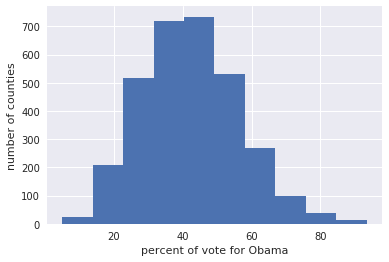

In [4]:
# Generating a histogram
plt.hist(dataset['dem_share'])

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')

# Show the plot
plt.show()

El número de columnas o *bins* determina la forma del gráfico. Diferentes números de columnas nos darán diferentes gráficos. El número óptimo dependerá siempre del data scientist.

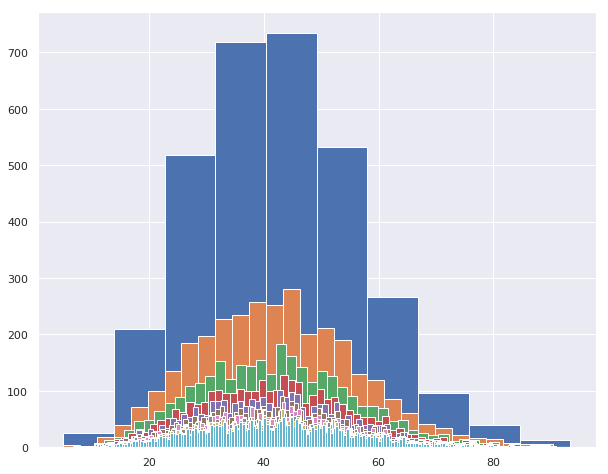

In [25]:
# define the bins
bin_edges = [bins for bins in range(10, 201, 20)]

# histogram
plt.figure(figsize=(10,8))
for bins in bin_edges:
    plt.hist(dataset['dem_share'], bins=bins)
plt.show()

En el gráfico anterior podríamos determinar que el histograma verde es el que mejor representa los datos. No tiene una sobrerepresentación como puede presentar el histograma rojo o morado, ni tiene una infrarrepresentación como si vemos claramente en el histograma azul y en menor medida, en el histograma naranja.

Una forma formal de buscar un valor óptimo es usar *la regla de la raíz cuadrada*. Calculamos la raíz cuadrada de la longitud de los datos.

In [22]:
def n_bins(data):
    """
    Function that computed the number of bins of a set
    """
    
    # Compute number of data points
    n_data = len(data)
    
    # Number of bins is the square root
    n_bins = np.sqrt(n_data)
    
    # Convert number of bins to integer
    n_bins = int(n_bins)
    
    return n_bins

A continuación vemos el resultado:

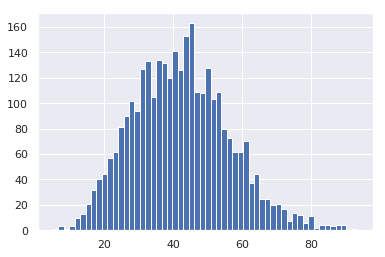

In [23]:
# number of bins
bins = n_bins(dataset.dem_share)

# histogram
plt.hist(dataset.dem_share, bins=bins)
plt.show()

## Plotting all of your data: Bee swarm plots

Los histogramas anteriores nos mostraron que la frecuencia de voto para Obama disminuye conforme nos acercamos a porcentajes mayores. La media está situada entorno al 40%, y en el percentil 75 obtenemos una cantidad del 50% aprox. Esto nos indica que el partido republicano obtuvo mejores resultados que el partido demócrata.

Una desventaja importante del uso del histograma es que el mismo conjunto de datos puede tener un aspecto diferente dependiendo de cómo se seleccionen las ubicaciones. Y la elección de los contenedores es en muchos sentidos arbitraria.

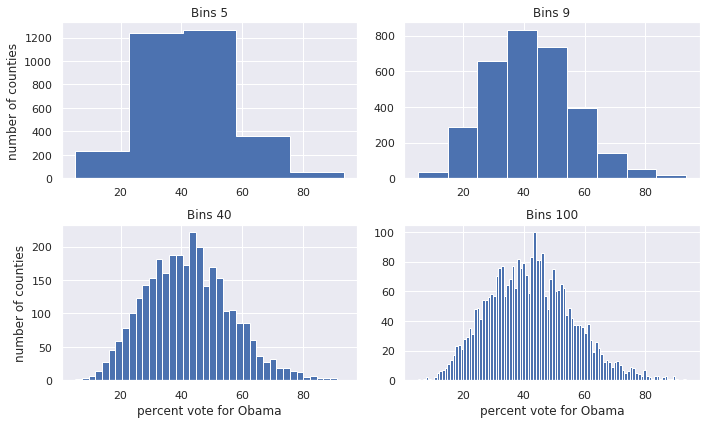

In [26]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.hist(dataset['dem_share'], bins=5, histtype='stepfilled')
plt.title('Bins 5')
plt.ylabel('number of counties')


plt.subplot(2,2,2)
plt.hist(dataset['dem_share'], bins=9)
plt.title('Bins 9')

plt.subplot(2,2,3)
plt.hist(dataset['dem_share'], bins=40)
plt.title('Bins 40')
plt.xlabel('percent vote for Obama')
plt.ylabel('number of counties')

plt.subplot(2,2,4)
plt.hist(dataset['dem_share'], bins=100)
plt.xlabel('percent vote for Obama')
plt.title('Bins 100')

# Show the plot
plt.tight_layout()
plt.show()

Para remediar estos problemas podemos hacer un gráfico llamado en inglés **bee swarm plots**. Esto se muestra mejor con un ejemplo:

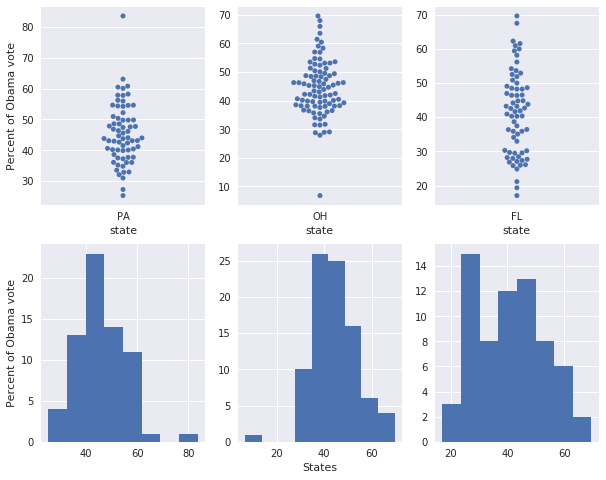

In [8]:
# selecting several states
PA = dataset[dataset['state'] == 'PA']
OH = dataset[dataset['state'] == 'OH']
FL = dataset[dataset['state'] == 'FL']

# Create a figure
plt.figure(figsize=(10,8))

# swarm plot
plt.subplot(2,3,1)
sns.swarmplot(x='state', y='dem_share', data=PA)
plt.ylabel("Percent of Obama vote")
plt.subplot(2,3,2)
sns.swarmplot(x='state', y='dem_share', data=OH)
plt.ylabel("")
plt.subplot(2,3,3)
sns.swarmplot(x='state', y='dem_share', data=FL)
plt.ylabel("")

# hist plot
plt.subplot(2,3,4)
plt.hist(PA['dem_share'], bins=n_bins(PA['dem_share']))
plt.ylabel("Percent of Obama vote")
plt.subplot(2,3,5)
plt.hist(OH['dem_share'], bins=n_bins(OH['dem_share']))
plt.xlabel("States")
plt.subplot(2,3,6)
plt.hist(FL['dem_share'], bins=n_bins(FL['dem_share']))


# Show the plot
plt.show()

Here is a bee swarm plot of the vote totals in the three swing states. Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precisa location along the x-axis is unimportant.
Notably, we no longer have any binning bias and all data are displayed. 
A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation.
In this case, an observation is a county, and the features are state and the Democratic share of the vote.
To make the plot, you need to specify which column gives the values for the y-axis, in this case the share of the vote that went to the Democrat Barack Obama, and the values for the x-axis, in this case the state.

From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states.

## Plotting all of your data: empirical cumulative distribution

The bee swarm plot has a limit to their efficacy. For example, image we wanted to plot the county-level voting data for all states east of the Mississippi River and all states west. We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi:

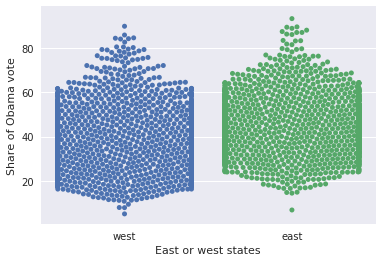

In [9]:
# swarmplot of west/est Mississippi
sns.swarmplot(x='east_west', y='dem_share', data=dataset)

# label the axes
plt.xlabel('East or west states')
plt.ylabel('Share of Obama vote')

# show the plot
plt.show()

Here, the bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option.
As an alternative, we can compute an empirical cumulative distribution function, or ECDF.

### Empirical cumulative distribution function (ECDF)

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange( 1, n + 1) / n

    return x, y

The x-axis is the sorted data and the y-axis is evenly spaced data poinst with a maximum of one, which we can generate using *np.arange* and then dividing by the total number of data points. Once we specify the x and y values, we plot the points.

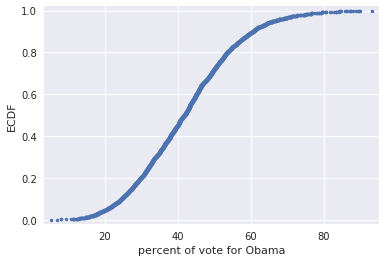

In [11]:
# apply ecdf function
x, y = ecdf(dataset['dem_share'])

# plot the result
plt.plot(x, y, marker='.', linestyle='none')

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

# margins
plt.margins(0.02) # keeps data off plot edges

# show the plot
plt.show()

A x-value of an ECDF is the quantity you are measuring, in this case the percent of vote that sent to Obama. The y-value is the fraction of data points that have a value smaller than the correspoding x-value.

For exmaple, we can see that 20% of counties in swing states had 36% or less of its people vote for Obama.
Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.

### Multiple ECDFs plot
We can also easily plot multiple ECDFs on the same plot.

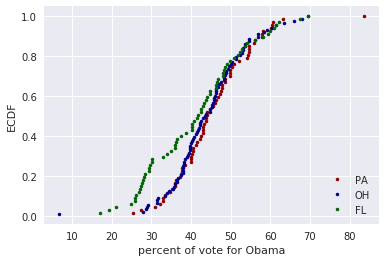

In [12]:
# We apply ecdf function to PA, OH and FL
x_pa, y_pa = ecdf(PA['dem_share']) # Pa democratic share of vote
x_oh, y_oh = ecdf(OH['dem_share']) # OH democratic share of vote
x_fl, y_fl = ecdf(FL['dem_share']) # FL democratic share of vote

# plot the results
plt.plot(x_pa, y_pa, marker='.', linestyle='none', color='darkred')
plt.plot(x_oh, y_oh, marker='.', linestyle='none', color='darkblue')
plt.plot(x_fl, y_fl, marker='.', linestyle='none', color='darkgreen')

# label the axes
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

# show legend
plt.legend(('PA', 'OH', 'FL'), loc='lower right')

# show the plot
plt.show()

We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties.

## Boxplot

boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

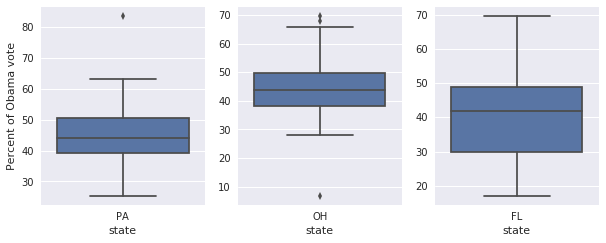

In [52]:
# Figure
plt.figure(figsize=(10,8))

# swarm plot
plt.subplot(2,3,1)
sns.boxplot(x='state', y='dem_share', data=PA)
plt.ylabel("Percent of Obama vote")
plt.subplot(2,3,2)
sns.boxplot(x='state', y='dem_share', data=OH)
plt.ylabel("")
plt.subplot(2,3,3)
sns.boxplot(x='state', y='dem_share', data=FL)
plt.ylabel("")

# show the graph
plt.show()

## Using Violin plot

### Constructing violin plots

Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

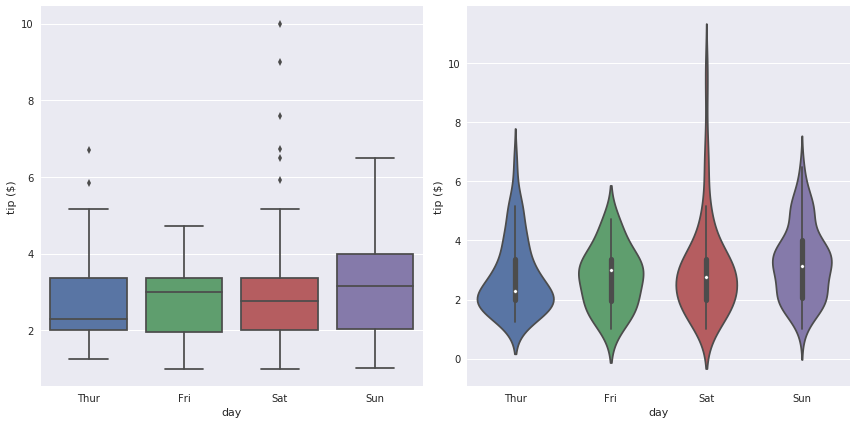

In [55]:
# Figure size
plt.figure(figsize=(12,6))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x='day', y='tip', data=tips)
plt.ylabel("tip ($)")

# violinplot
plt.subplot(1,2,2)
sns.violinplot(x='day', y='tip', data=tips)
plt.ylabel("tip ($)")

# ajust and show the plot
plt.tight_layout()
plt.show()


## Combining plots

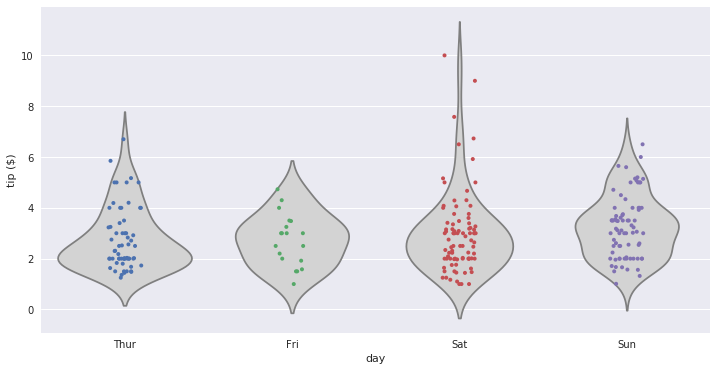

In [57]:
# figure
plt.figure(figsize=(12,6))

# violinplot
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='lightgray')

# strippplot
sns.stripplot(x='day', y='tip', data=tips, size=4, jitter=True)

# label the axes and show
plt.ylabel("tip ($)")
plt.show()

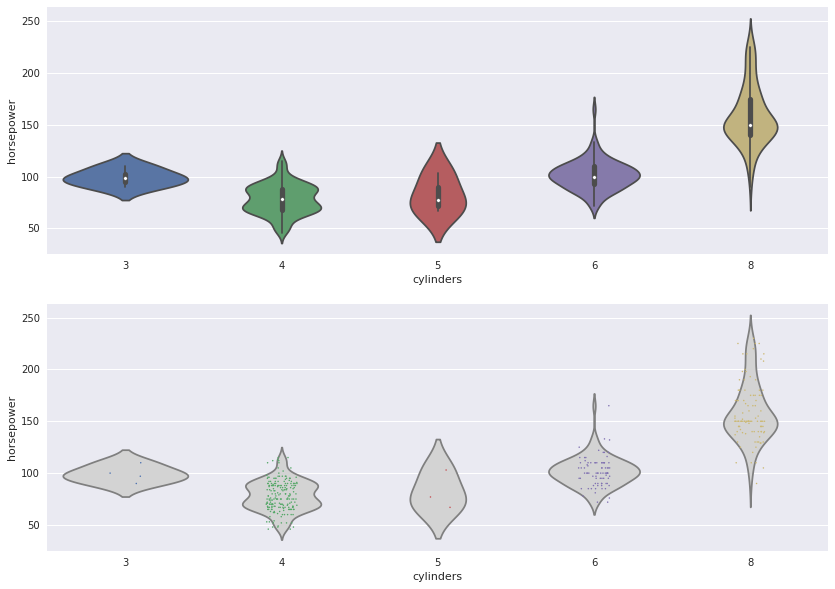

In [67]:
# figure size
plt.figure(figsize=(14,10))

# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cylinders', y='horsepower', data=mpg)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cylinders', y='horsepower', data=mpg, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cylinders', y='horsepower', data=mpg, jitter=True, size=1.5)

# Display the plot
plt.show()

## Constructing swarm plots

As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

* The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).
* The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).
* Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.

In this exercise, you'll use the auto DataFrame again to illustrate the use of sns.swarmplot() with grouping by hue and with explicit specification of the orientation using the keyword orient.

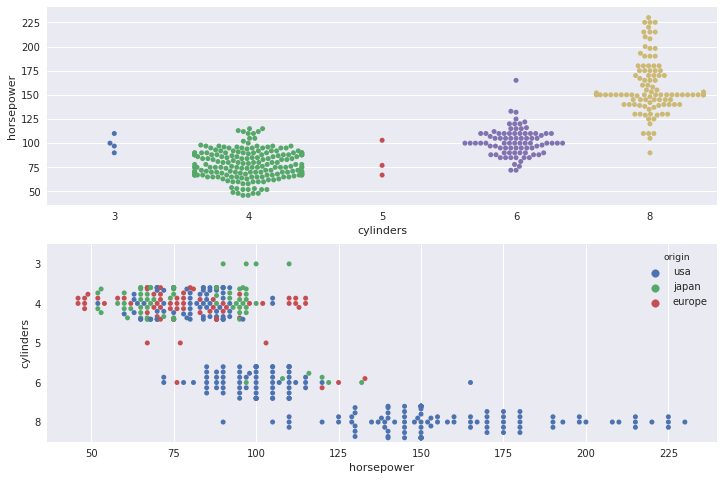

In [61]:
# figure size
plt.figure(figsize=(12,8))

# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x = 'cylinders', y = 'horsepower', data=mpg)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(y = 'cylinders', x = 'horsepower', data=mpg, orient='h', hue='origin')

# Display the plot
plt.show()

# Visualizing multivariate distributions

Visualizing relationships in multivariate data

* Joint plot
* Heat plot
* Pair plot

## Joint plot

Plotting joint distributions (2)

The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

* `kind='scatter'` uses a scatter plot of the data points
* `kind='reg'` uses a regression plot (default order 1)
* `kind='resid'` uses a residual plot
* `kind='kde'` uses a kernel density estimate of the joint distribution
* `kind='hex'` uses a hexbin plot of the joint distribution

/home/pablo/Programas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/pablo/Programas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


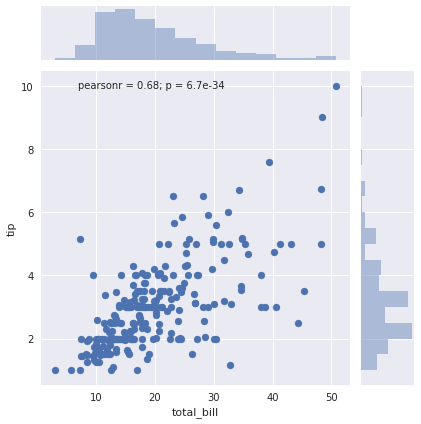

In [69]:
# jointplot
sns.jointplot(x='total_bill', y='tip', data=tips)

# show the graph
plt.show()

### Jointplot with KDE

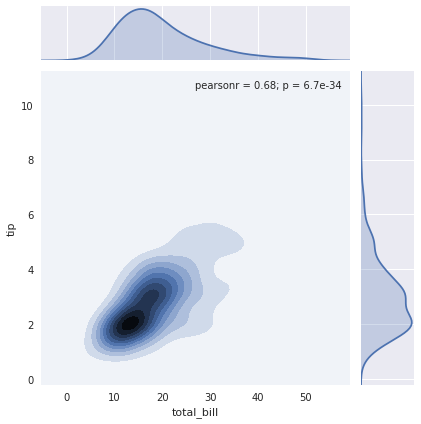

In [70]:
# jointplot
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

# show the graph
plt.show()

## Pair plot

You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument kind='reg' (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.

You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

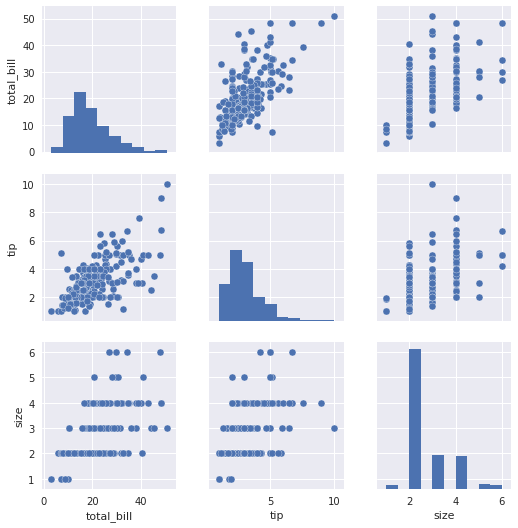

In [71]:
sns.pairplot(tips)
plt.show()

### Pair plot with hue

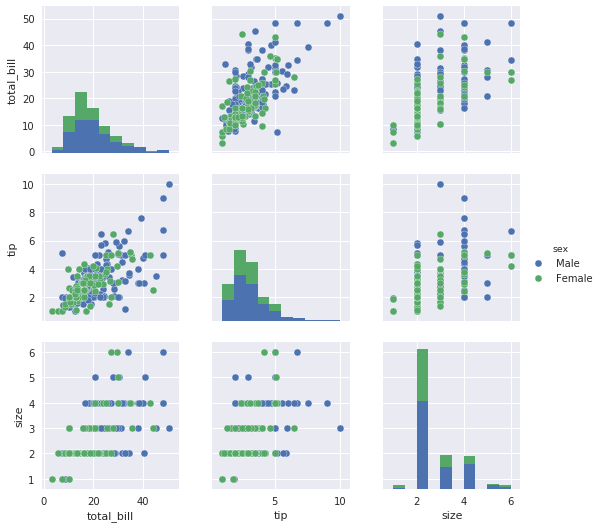

In [72]:
sns.pairplot(tips, hue='sex')
plt.show()

## Heat plot

### Covariance heat map of data

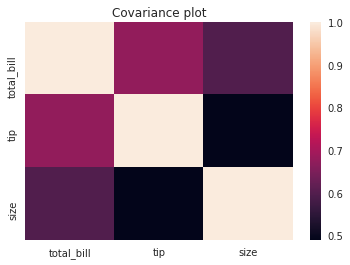

In [76]:
# covariance matrix
cov = tips.corr()

# heat map
sns.heatmap(cov)
plt.title("Covariance plot")
plt.show()

## Linear regression with seaborn (sns)

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you could call sns.lmplot(x='area', y='price', data=df).

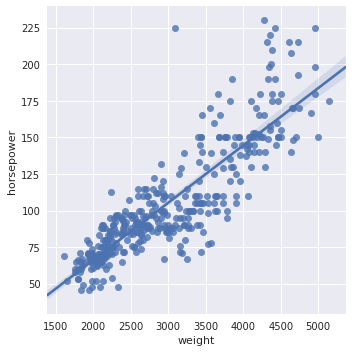

In [35]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='horsepower',data=mpg)

# Display the plot
plt.show()

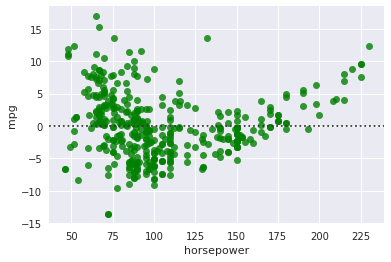

In [37]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='horsepower', y='mpg', data=mpg, color='green')

# Display the plot
plt.show()

## Higher-order regressions

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using sns.regplot() (the function sns.lmplot() is a higher-level interface to sns.regplot()). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

* A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).
* For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.
* The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

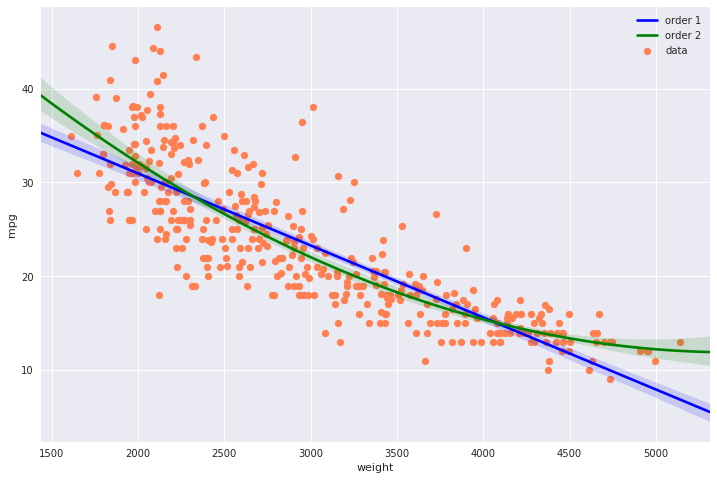

In [40]:
# figure
plt.figure(figsize=(12,8))

# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(mpg['weight'], mpg['mpg'], label='data', color='coral', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=mpg, label='order 1',
            scatter=None, color='blue')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=mpg, label='order 2',
            scatter=None, color='green', order=2)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

## Grouping linear regressions by hue

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

In the automobile dataset - which has been pre-loaded here as auto - you can view the relationship between weight ('weight') and horsepower ('hp') of the cars and group them by their origin ('origin'), giving you a quick visual indication how the relationship differs by continent.

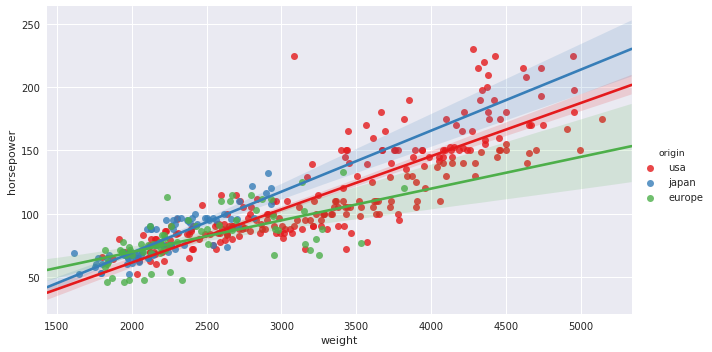

In [47]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='horsepower', data=mpg, hue='origin', palette='Set1', aspect=1.8)

# Display the plot
plt.show()

## Grouping linear regressions by row or column

Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The `sns.lmplot()` accepts the arguments row and/or col to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument row to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.

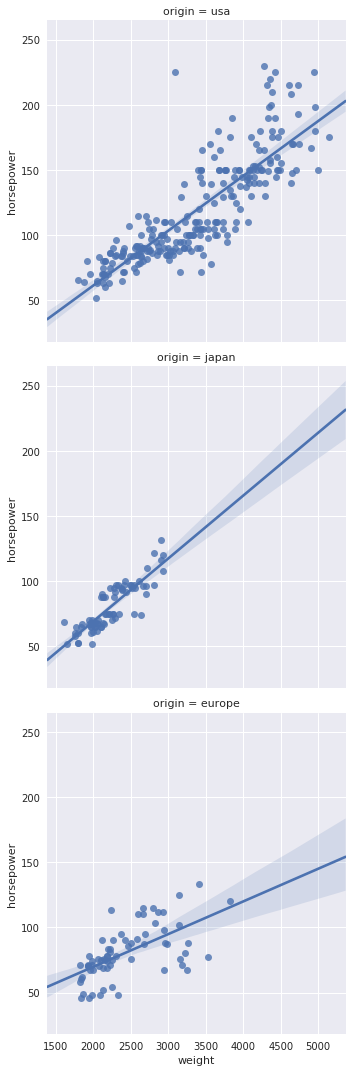

In [49]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='horsepower', row='origin', data=mpg)

# Display the plot
plt.show()